### 1. Import Libraries & Data

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_theme(rc={'figure.figsize':(5,3)})

In [2]:
# create Pandas Data Frame
df = pd.read_csv(r"C:/Users/monstr/Desktop/Machine_Learning_Algorithms/C_Datasets/Co2_Emission.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# check the columns
df.info()
# there is no null data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### 2. Examine Relationships

- ENGINESIZE: Total displacement of all cylinders (in litres)
- FUELCONSUMPTION_HWY: Highway fuel consumption rating shown in litres per 100 kilometres
- FUELCONSUMPTION_COMB: Combined fuel consumption rating shown in litres per 100 kilometres
- CO2EMISSIONS: The vehicle's tailpipe emissions of carbon dioxide shown in grams per kilometre for combined city and highway driving

In [4]:
# shrink the Data Frame to be understandable
df_regression = df[["ENGINESIZE", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
df_regression.sample(7)

,ENGINESIZE,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
491,3.5,8.5,10.7,246
445,5.3,14.2,16.5,380
497,1.5,6.9,7.7,177
649,3.0,10.1,12.3,283
907,4.8,9.7,12.8,294
66,2.0,8.8,10.3,237
791,1.6,6.8,7.8,179


In [5]:
# examine the relationships between target feature and independent features one by one

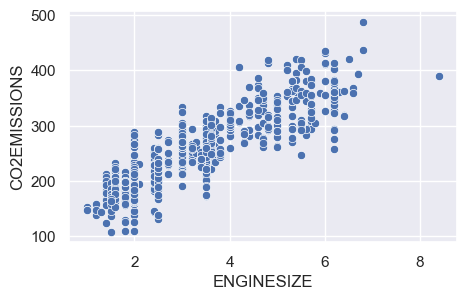

In [6]:
# Relationship-1: ENGINESIZE - CO2EMISSIONS
sns.scatterplot(data=df_regression, x="ENGINESIZE", y="CO2EMISSIONS")
plt.show()

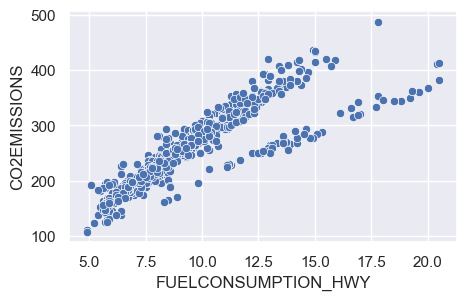

In [7]:
# Relationship-1: FUELCONSUMPTION_HWY - CO2EMISSIONS
sns.scatterplot(data=df_regression, x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS")
plt.show()

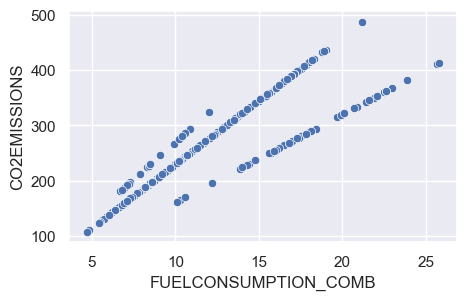

In [8]:
# Relationship-1: FUELCONSUMPTION_COMB - CO2EMISSIONS
sns.scatterplot(data=df_regression, x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS")
plt.show()

#### 3. Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
df_regression.loc[:, "ENGINESIZE"] = scaler.fit_transform(df_regression.iloc[:, :-1])[:, 0]
df_regression.loc[:, "FUELCONSUMPTION_HWY"] = scaler.fit_transform(df_regression.iloc[:, :-1])[:, 1]
df_regression.loc[:, "FUELCONSUMPTION_COMB"] = scaler.fit_transform(df_regression.iloc[:, :-1])[:, 2]

In [11]:
df_regression.sample(7)

,ENGINESIZE,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
585,-0.244694,-0.384721,-0.482463,267
1,-0.668653,-0.635329,-0.568571,221
68,0.461905,0.116497,0.378626,297
142,-1.375251,-0.814335,-0.884304,196
5,0.108606,-0.635329,-0.453760,230
869,0.037946,-0.277317,-0.310245,242
135,-0.951292,-0.850136,-0.712086,209


### 4. Split Data Frame to Train & Test Set

In [12]:
X_1 = df_regression.loc[:, "ENGINESIZE"].values.reshape(-1, 1)
X_2 = df_regression.loc[:, "FUELCONSUMPTION_HWY"].values.reshape(-1, 1)
X_3 = df_regression.loc[:, "FUELCONSUMPTION_COMB"].values.reshape(-1, 1)
y = df_regression.loc[:, "CO2EMISSIONS"].values.reshape(-1, 1)

In [13]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.25, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.25, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.25, random_state=42)

In [14]:
if np.array_equal(y_test_1, y_test_2) and np.array_equal(y_test_1, y_test_3) and np.array_equal(y_test_2, y_test_3):
    print("All three arrays are exactly equal.")
else:
    print("All three arrays are not exactly equal.")

All three arrays are exactly equal.


### 5. Create Model

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg_model_1 = LinearRegression().fit(X_train_1, y_train_1)
lin_reg_model_2 = LinearRegression().fit(X_train_2, y_train_2)
lin_reg_model_3 = LinearRegression().fit(X_train_3, y_train_3)

y_pred_1 = lin_reg_model_1.predict(X_test_1).reshape(1, -1)
y_pred_2 = lin_reg_model_2.predict(X_test_2).reshape(1, -1)
y_pred_3 = lin_reg_model_3.predict(X_test_3).reshape(1, -1)

y_actual = y_test_1.reshape(1, -1) # or y_test_2 or y_test_3 

In [16]:
df_result = pd.DataFrame({"y_actual": y_actual[0], "y_pred_1": y_pred_1[0], "y_pred_2": y_pred_2[0], "y_pred_3": y_pred_3[0]})
df_result

,y_actual,y_pred_1,y_pred_2,y_pred_3
0,304,309.424255,274.104454,282.276751
1,221,262.751751,220.062482,224.339222
2,294,266.641126,264.454102,275.839248
3,221,243.304874,214.272270,224.339222
4,207,204.411120,210.412129,214.682967
...,...,...,...,...
262,292,297.756129,262.524031,274.229872
263,271,293.866753,264.454102,259.745490
264,306,321.092381,272.174384,283.886127
265,290,270.530501,277.964595,272.620497


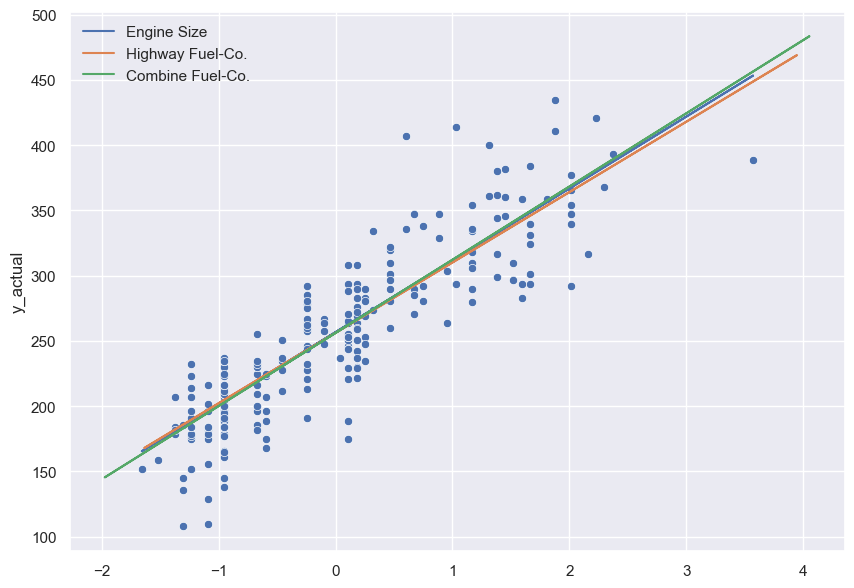

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_test_1.reshape(1, -1)[0], y=df_result["y_actual"])
plt.plot(X_test_1.reshape(1, -1)[0], df_result["y_pred_1"], label="Engine Size")
plt.plot(X_test_2.reshape(1, -1)[0], df_result["y_pred_2"], label="Highway Fuel-Co.")
plt.plot(X_test_3.reshape(1, -1)[0], df_result["y_pred_3"], label="Combine Fuel-Co.")

plt.legend()
plt.show()

### 6. Evaluation

We'll use three following methods for Regression:

    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - R Squared (R2)

In [27]:
from sklearn.metrics import mean_absolute_error

MAE_1 = mean_absolute_error(y_pred_1[0], y_actual[0])
MAE_2 = mean_absolute_error(y_pred_2[0], y_actual[0])
MAE_3 = mean_absolute_error(y_pred_3[0], y_actual[0])

In [29]:
from sklearn.metrics import mean_squared_error

MSE_1 = mean_squared_error(y_pred_1[0], y_actual[0])
MSE_2 = mean_squared_error(y_pred_2[0], y_actual[0])
MSE_3 = mean_squared_error(y_pred_3[0], y_actual[0])

In [40]:
# Root Mean Squared Error (RMSE) 
RMSE_1 = np.sqrt(MSE_1)
RMSE_2 = np.sqrt(MSE_2)
RMSE_3 = np.sqrt(MSE_3)

In [44]:
from sklearn.metrics import r2_score

r2_1 = r2_score(y_pred_1[0], y_actual[0])
r2_2 = r2_score(y_pred_2[0], y_actual[0])
r2_3 = r2_score(y_pred_3[0], y_actual[0])

In [47]:
my_data = {
    "Feature": ["ENGINESIZE", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB"],
    "MAE": [MAE_1, MAE_2, MAE_3],
    "MSE": [MSE_1, MSE_2, MSE_3],
    "RMSE": [RMSE_1, RMSE_2, RMSE_3],
    "R2": [r2_1, r2_2, r2_3]
}

df_evaluation = pd.DataFrame(my_data)

In [48]:
df_evaluation

,Feature,MAE,MSE,RMSE,R2
0,ENGINESIZE,23.804282,972.118154,31.178809,0.679518
1,FUELCONSUMPTION_HWY,25.177793,1073.894508,32.770330,0.614193
2,FUELCONSUMPTION_COMB,21.250286,832.965419,28.861140,0.732843
